In [1]:
import sqlalchemy
import mysql.connector
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/ekenee/Desktop/all_seasons.csv")


# All of NBA dataset info (dataset is too large to  show all info on page)
- Columns include.. player_name, team_abbreviation, age, player_weight, college, country, draft_year,    draft_year, pts, reb, ast, net_rating, oreb_pct(offesnsive rebound %), dreb_pct(defensive rebound %), ts_pct(true shooting %), ast_pct, and season

In [46]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


# Top 10 first player rows in the dataset
- Dennis Rodman, Dwayne Schintzius, Earl Cureton, Ed O'Bannon, Ed Pinckney, Eddie Johnson, Elden Campbell, Eldridge Recasner, and Elliot Perry

In [48]:
top10 = df.head(10)
top10

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97
6,6,Eddie Jones,LAL,25.0,198.12,86.182480,Temple,USA,1994,1,...,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-97
7,7,Elden Campbell,LAL,28.0,213.36,113.398000,Clemson,USA,1990,1,...,14.9,8.0,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-97
8,8,Eldridge Recasner,ATL,29.0,193.04,86.182480,Washington,USA,1992,Undrafted,...,5.7,1.6,1.3,-0.3,0.036,0.076,0.172,0.539,0.141,1996-97
9,9,Elliot Perry,MIL,28.0,182.88,72.574720,Memphis,USA,1991,2,...,6.9,1.5,3.0,-1.2,0.018,0.081,0.177,0.557,0.262,1996-97


# Last 10 player rows in the dataset 
- Mason Jones, Marvin Bagley III, Marquese Chriss, Markus Howard, Marko Simonovic, Markieff Morris, Markelle Fultz, Marcus Smart, Marcus Garrett, and Micah Potter

In [4]:
bottom10 = df.tail(10)
bottom10

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12295,12295,Mason Jones,LAL,23.0,193.04,90.718400,Arkansas,USA,Undrafted,Undrafted,...,6.8,2.5,1.0,22.8,0.020,0.148,0.180,0.625,0.129,2021-22
12296,12296,Marvin Bagley III,DET,23.0,210.82,106.594120,Duke,USA,2018,1,...,11.3,7.0,0.8,-5.6,0.084,0.200,0.191,0.551,0.049,2021-22
12297,12297,Marquese Chriss,DAL,24.0,205.74,108.862080,Washington,USA,2016,1,...,4.5,3.0,0.5,-2.1,0.096,0.197,0.205,0.518,0.079,2021-22
12298,12298,Markus Howard,DEN,23.0,177.80,79.378600,Marquette,USA,Undrafted,Undrafted,...,4.1,0.4,0.2,-4.9,0.010,0.064,0.264,0.567,0.068,2021-22
12299,12299,Marko Simonovic,CHI,22.0,210.82,99.790240,None,Montenegro,2020,2,...,1.9,1.1,0.0,1.2,0.122,0.119,0.247,0.428,0.000,2021-22
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22
12304,12304,Micah Potter,DET,24.0,208.28,112.490816,Wisconsin,USA,Undrafted,Undrafted,...,4.0,3.0,0.0,-56.4,0.095,0.125,0.148,0.505,0.000,2021-22


# Details the names of rows and the number of columns and rows in the dataset



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

# Core Statistics DataFrame
- I want to grab the core statistics of an NBA players and their names

- This new dataframe I'm creating, core_stats, is going to only include the columns player_name, pts, ast, reb, and season inside of it

- These stats are only associated with the player's corresponding season.

- Ex: Dennis Rodman averaged 5.7 pts, 3.1 assist, 16.1 only for the 1996-97 season

In [6]:
core_stats = df[['player_name','pts','ast','reb','season']]
core_stats

,player_name,pts,ast,reb,season
0,Dennis Rodman,5.7,3.1,16.1,1996-97
1,Dwayne Schintzius,2.3,0.3,1.5,1996-97
2,Earl Cureton,0.8,0.4,1.0,1996-97
3,Ed O'Bannon,3.7,0.6,2.3,1996-97
4,Ed Pinckney,2.4,0.2,2.4,1996-97
...,...,...,...,...,...
12300,Markieff Morris,7.6,1.4,2.6,2021-22
12301,Markelle Fultz,10.8,5.5,2.7,2021-22
12302,Marcus Smart,12.1,5.9,3.8,2021-22
12303,Marcus Garrett,1.1,0.6,1.9,2021-22


# Best Scorers DataFrame
- This new dataframe that I've created from the core_stats dataframe features the best scorers in the NBA in their respective years

- To qualify to be on this list, the player must have had to average 20ppg or more for their respective seasons

In [7]:
bestscorers = core_stats[core_stats['pts'] >= 20].sort_values('pts',ascending=False)
bestscorers

,player_name,pts,ast,reb,season
10572,James Harden,36.1,7.5,6.6,2018-19
4342,Kobe Bryant,35.4,4.5,5.3,2005-06
11041,James Harden,34.3,7.5,6.6,2019-20
4124,Allen Iverson,33.0,7.4,3.2,2005-06
2953,Tracy McGrady,32.1,5.5,6.5,2002-03
...,...,...,...,...,...
10449,Lou Williams,20.0,5.4,3.0,2018-19
7807,Rudy Gay,20.0,2.9,6.0,2013-14
10023,Klay Thompson,20.0,2.5,3.8,2017-18
3465,Elton Brand,20.0,3.3,10.3,2003-04


# Best Scorers Bar Graph Visualization

- This bar graph compares the best scorers's points per game averages 

[Text(0.5, 1.0, 'BEST SCORERS'),
 Text(0.5, 0, 'PLAYERS'),
 Text(0, 0.5, 'POINTS PER GAME')]

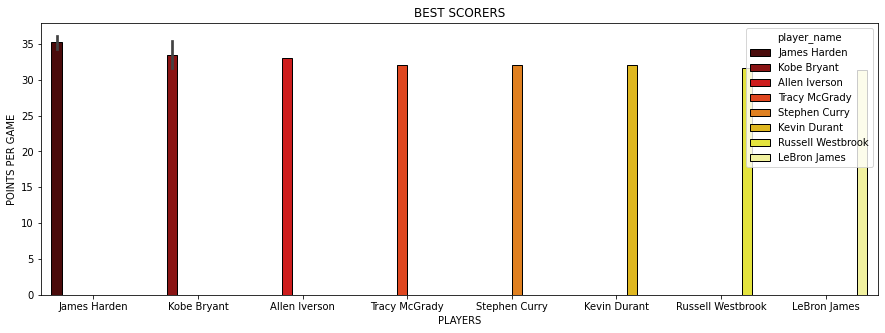

In [8]:
plt.figure(figsize=(15,5))
topten = bestscorers.head(10)
sns.barplot(data=topten, x="player_name", y="pts", 
            palette = 'hot', 
            hue = 'player_name', 
            edgecolor = 'black',
            lw = 1).set(title = 'BEST SCORERS', xlabel = 'PLAYERS', ylabel = 'POINTS PER GAME')

# Best Passers DataFrame
- This dataframe features the best passers of the basketball for their respective seasons
- To qualify for this list, the player has have to have averaged at least 10 assist per game for their respective seasons

In [9]:
bestpassers = core_stats[core_stats['ast'] >= 10].sort_values('ast',ascending=False)
bestpassers

,player_name,pts,ast,reb,season
11433,Russell Westbrook,22.2,11.7,11.5,2020-21
8787,Rajon Rondo,11.9,11.7,6.0,2015-16
6896,Rajon Rondo,11.9,11.7,4.8,2011-12
4772,Steve Nash,18.6,11.6,3.5,2006-07
5049,Chris Paul,21.1,11.6,4.0,2007-08
3577,Steve Nash,15.5,11.5,3.3,2004-05
430,Mark Jackson,9.9,11.4,4.8,1996-97
6357,Steve Nash,14.7,11.4,3.5,2010-11
6609,Rajon Rondo,10.6,11.2,4.4,2010-11
9465,James Harden,29.1,11.2,8.1,2016-17


# Best Passers Bar Graph Visualization

- This bar graph compares the best passer's assist per game averages 

[Text(0.5, 1.0, 'BEST PASSERS'),
 Text(0.5, 0, 'PLAYERS'),
 Text(0, 0.5, 'ASSISTS PER GAME')]

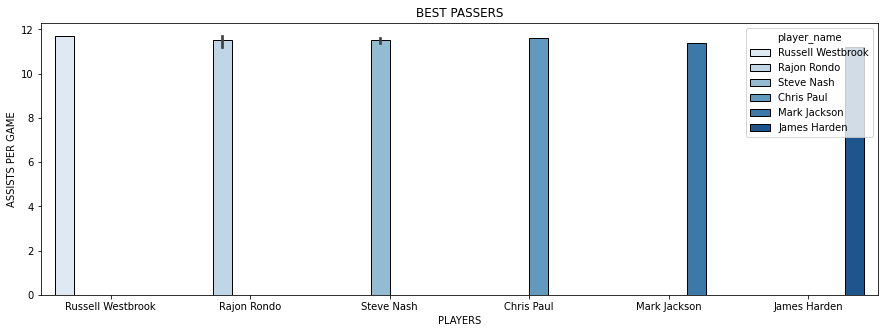

In [10]:
plt.figure(figsize=(15,5))
topten = bestpassers.head(10)
sns.barplot(data=topten, x="player_name", y="ast", 
            palette = 'Blues', 
            hue = 'player_name', 
            edgecolor = 'black',
            lw = 1).set(title = 'BEST PASSERS', xlabel = 'PLAYERS', ylabel = 'ASSISTS PER GAME')

# Best Rebounders DataFrame
- This dataframe features the best rebounding players in the league for their respective seasons
- To qualify for this list, the player had to have averaged at least 13 rebounds a game for their respective seasons

In [11]:
bestrebounders = core_stats[core_stats['reb'] >= 13].sort_values('reb',ascending=False)
bestrebounders

,player_name,pts,ast,reb,season
1791,Danny Fortson,16.7,0.8,16.3,2000-01
0,Dennis Rodman,5.7,3.1,16.1,1996-97
9825,Andre Drummond,15.0,3.0,16.0,2017-18
10203,Andre Drummond,17.3,1.4,15.6,2018-19
2741,Ben Wallace,6.9,1.6,15.4,2002-03
9665,DeAndre Jordan,12.0,1.5,15.2,2017-18
10976,Andre Drummond,17.7,2.7,15.2,2019-20
6462,Kevin Love,20.2,2.5,15.2,2010-11
728,Dennis Rodman,4.7,2.9,15.0,1997-98
8536,DeAndre Jordan,11.5,0.7,15.0,2014-15


# Best Rebounders Bar Graph Visualization
- This bar graph compares the best rebounders's rebounds per game averages 

[Text(0.5, 1.0, 'BEST REBOUNDERS'),
 Text(0.5, 0, 'PLAYERS'),
 Text(0, 0.5, 'REBOUNDS PER GAME')]

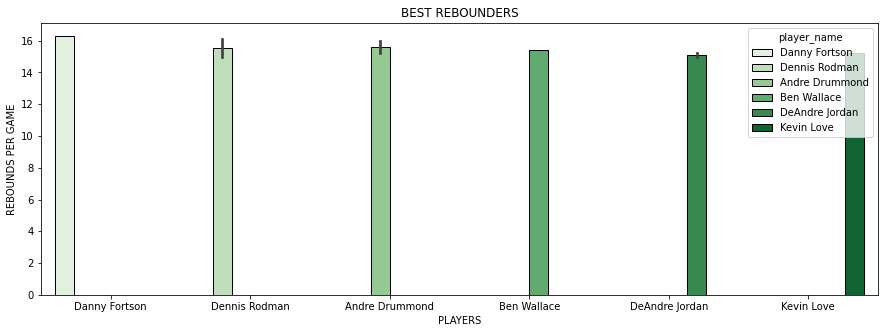

In [12]:
plt.figure(figsize=(15,5))
topten = bestrebounders.head(10)
sns.barplot(data=topten, x="player_name", y="reb", 
            palette = 'Greens', 
            hue = 'player_name', 
            edgecolor = 'black',
            lw = 1).set(title = 'BEST REBOUNDERS', xlabel = 'PLAYERS', ylabel = 'REBOUNDS PER GAME')

# Best All Around Players DataFrame
- This dataframe is for the most well rounded players of all time in the league for their respective seasons.
- To qualify for this list, these players have had to have averaged at least 20 points per game, 10 assist per game, and 7 rebounds per game at some point in their careers
- As you can see, Russel Westbrook has had the most seasons of being an excellent all around player in the league



In [49]:
allaround = core_stats.loc[(core_stats['pts'] >= 20) & 
                           (core_stats['ast'] >= 10) & 
                           (core_stats['reb'] >= 7),
                            ['player_name','pts','ast','reb','season']]
allaround

,player_name,pts,ast,reb,season
8822,Russell Westbrook,23.5,10.4,7.8,2015-16
9143,Russell Westbrook,31.6,10.4,10.7,2016-17
9465,James Harden,29.1,11.2,8.1,2016-17
10084,Russell Westbrook,25.4,10.3,10.1,2017-18
10161,Russell Westbrook,22.9,10.7,11.1,2018-19
10734,LeBron James,25.3,10.2,7.8,2019-20
11433,Russell Westbrook,22.2,11.7,11.5,2020-21
11550,James Harden,24.6,10.8,7.9,2020-21
11833,James Harden,22.0,10.3,7.7,2021-22


# All Around Players Bar Graph Visualizations
- These three different graphs compare the points per game, the assist per game, and the rebounders per game for each of the players that qualified for the list 
- If the player qualified for the list for more than one year, that was factored into their averages 

[Text(0.5, 1.0, 'REBOUNDS'),
 Text(0.5, 0, 'PLAYER NAME'),
 Text(0, 0.5, 'REBOUNDS PER GAME')]

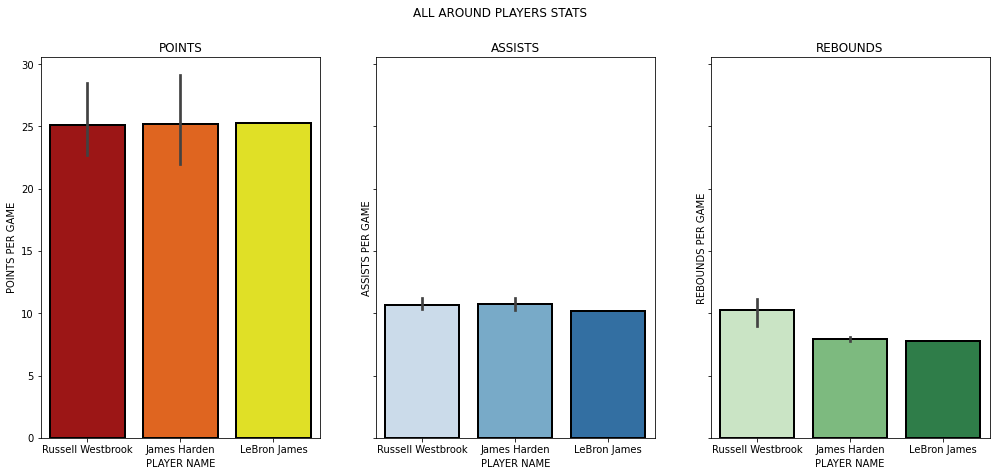

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(17, 7), sharey=True)
fig.suptitle('ALL AROUND PLAYERS STATS')


sns.barplot(ax=axes[0], data = allaround, x = 'player_name', y ='pts', palette = 'hot', edgecolor = 'black', lw = 2)
axes[0].set(title = 'POINTS', xlabel = 'PLAYER NAME', ylabel = 'POINTS PER GAME')

sns.barplot(ax=axes[1], data = allaround, x = 'player_name', y ='ast', palette = 'Blues', edgecolor = 'black', lw = 2)
axes[1].set(title = 'ASSISTS', xlabel = 'PLAYER NAME', ylabel = 'ASSISTS PER GAME')


sns.barplot(ax=axes[2], data = allaround, x = 'player_name', y ='reb', palette = 'Greens', edgecolor = 'black', lw = 2)
axes[2].set(title = 'REBOUNDS', xlabel = 'PLAYER NAME', ylabel = 'REBOUNDS PER GAME')

- This is getting the top 20 passers, scorers, and rebounders and giving them their own dataframes
- We will be inserting the information into a SQL database

In [19]:
toppassers = bestpassers.head(20)
topreb = bestrebounders.head(20)
topscorers = bestscorers.head(20)

ts = topscorers[['player_name', 'pts','season']]
trb = topreb[['player_name', 'reb', 'season']]
tpa = toppassers[['player_name', 'ast', 'season']]

# Creating a Connection to NBA_stats Database
- In this block of code I am creating a connection to my local database and creating the first table that will be holding the toppassers dataframe information

In [23]:
connection = mysql.connector.connect(host="localhost", user='root', password='kobedrop81', database ="NBA_stats") 
cursorObject = connection.cursor()

cursorObject.execute("CREATE TABLE TopPassers(Player TEXT(255), AssistAvg VARCHAR(255), Season VARCHAR(255));")

# Inserting toppassers DataFrame info into TopPassers Table in Database
- This block of code is inserting my dataframe info for the best passers into the TopPassers table in the database

In [24]:
query = "INSERT INTO TopPassers (Player, AssistAvg, Season) VALUES (%s,%s,%s)"   
cursorObject.executemany(query, [[row[0], row[1], row[2]] for row in tpa.to_numpy()])
connection.commit()

# Inserting topscorers and toprebounders Info into Database Tables
- This block of code is creating tables for the best scorers info and best rebounders info
- Then it is inserting that info into their respective tables

In [28]:
cursorObject.execute("CREATE TABLE TopScorers(Player TEXT(255), PointsAvg VARCHAR(255), Season VARCHAR(255));")
querytwo = "INSERT INTO TopScorers (Player, PointsAvg, Season) VALUES (%s,%s,%s)"   
cursorObject.executemany(querytwo, [[row[0], row[1], row[2]] for row in ts.to_numpy()])


cursorObject.execute("CREATE TABLE TopRebounders(Player TEXT(255), ReboundAvg VARCHAR(255), Season VARCHAR(255));")
querythree = "INSERT INTO TopRebounders (Player, ReboundAvg, Season) VALUES (%s,%s,%s)"   
cursorObject.executemany(querythree, [[row[0], row[1], row[2]] for row in trb.to_numpy()])

connection.commit()